In [1]:
import sys
if '/home/cv/Dropbox/PHD/Python/ESO/spectra_DL' in sys.path:
    sys.path.remove('/home/cv/Dropbox/PHD/Python/ESO/spectra_DL')


In [2]:
import torch
from HARPS_DL.datasets.Labels import Labels


## Load Models

In [3]:
from HARPS_DL.models_structured.model_infoVAE import info_VAE as infoVAE
from HARPS_DL.models_structured.model_composite import composite_VAE
models = {}

### InfoVAE

In [4]:
labels = Labels(
            datasets_names=['ETC', 'real'],
            labels=["radvel", "BERV", "Teff", "[M/H]", "logg", "airmass", "H2O_pwv"],
            labels_type = 6*["shared"] + ["ETC"],
            bottleneck=32,
            fill_bottleneck=['ETC'],
            )
labels.json2normalization()

model = infoVAE(
        encoder_name='CNN_classic',
        decoder_name='ResNet_small',
        labels=labels,
        )
model_ckpt = '../selected_models/infoVAE/375-0.108.ckpt'
state_dict = torch.load(model_ckpt, map_location='cpu')['state_dict']
model.load_state_dict(state_dict)
model.eval()
models['infoVAE'] = {'model': model, 'labels': labels}


/tmp/ipykernel_1758319/840858903.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_ckpt, map_location='cpu')['state_dict']


### AE (mix)

In [5]:
labels = Labels(
    datasets_names=['ETC', 'real'],
    labels=["radvel", "BERV", "Teff", "[M/H]", "logg", "airmass"],
    labels_type=6*["shared"],        
    bottleneck=9,
    fill_bottleneck=['ETC'],
)
labels.json2normalization()

model = infoVAE(
        encoder_name='CNN_classic',
        decoder_name='ResNet_small',
        labels=labels,
        bottleneck=9,
        )
model_ckpt = '../selected_models/AE (mix)/221-0.107.ckpt'
state_dict = torch.load(model_ckpt, map_location='cpu')['state_dict']
model.load_state_dict(state_dict)
model.eval()

models['AE (mix)'] = {'model': model, 'labels': labels} 

/tmp/ipykernel_1758319/479638213.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_ckpt, map_location='cpu')['state_dict']


### AE (real)

In [6]:
labels = Labels(
    datasets_names=['ETC', 'real'],
    labels=["radvel", "BERV", "Teff", "[M/H]", "logg", "airmass"],
    labels_type=6*["real"],        
    bottleneck=9,
    fill_bottleneck=['ETC'],
)
labels.json2normalization()

model = infoVAE(
        encoder_name='CNN_classic',
        decoder_name='ResNet_small',
        labels=labels,
        bottleneck=9,
        )
model_ckpt = '../selected_models/AE (real)/439-0.103.ckpt'
state_dict = torch.load(model_ckpt, map_location='cpu')['state_dict']
model.load_state_dict(state_dict)
model.eval()

models['AE (real)'] = {'model': model, 'labels': labels} 

/tmp/ipykernel_1758319/4036647572.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_ckpt, map_location='cpu')['state_dict']


### Sedaghat et al (https://arxiv.org/abs/2009.12872)

In [7]:
composite_VAE.reference_model_loader()['model']
models['beta-VAE (real,U)'] =  {'model': model, 'labels': None} 

/home/cv/Dropbox/PHD/Python/ESO/standalone_share/src/HARPS_DL/models_structured/legacy_mix_in.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(ck

## Real Spectrum

In [8]:
from astropy.io import fits
import numpy as np
from HARPS_DL.datasets.Dataset_mixin import Dataset_mixin

hdul = fits.open('ADP.2014-10-02T10:02:10.163.fits')
wave = hdul[1].data.field('WAVE').astype(np.float32).ravel() # barycentric
spectrum_fits = hdul[1].data.field('FLUX').astype(np.float32).ravel()
emul_wave = Dataset_mixin.get_wave()

spectrum = np.interp(emul_wave, wave, spectrum_fits)

Text(0.5, 1.0, 'spectrum in')

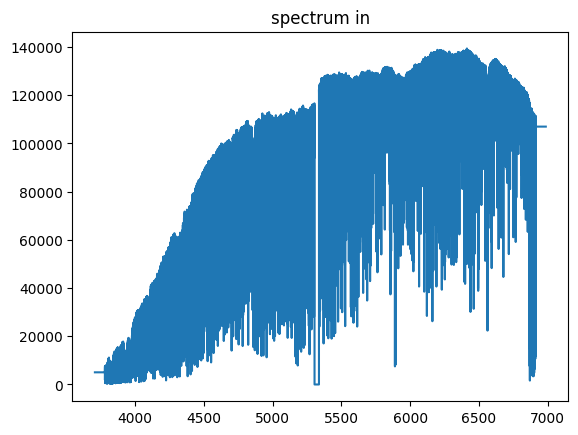

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
#spectrum = Dataset_mixin.static_norm_by_median(spectrum, median_threshold=0)
plt.figure()
plt.plot(emul_wave, spectrum)
plt.title('spectrum in')

/home/cv/Dropbox/PHD/Python/ESO/standalone_share/replicated_env/lib/python3.10/site-packages/torch/nn/modules/instancenorm.py:88: UserWarning: input's size at dim=1 does not match num_features. You can silence this warning by not passing in num_features, which is not used because affine=False
  warnings.warn(f"input's size at dim={feature_dim} does not match num_features. "


interactive(children=(Checkbox(value=True, description='spectrum in'), Checkbox(value=True, description='infoV…

<function __main__.update_plot(**kwargs)>

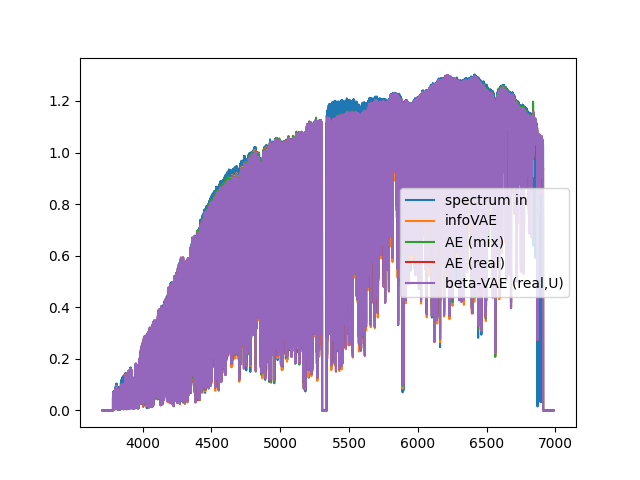

In [10]:
%matplotlib ipympl
from ipywidgets import interact, Checkbox
plt.close('all')

# Prepare spectrum for the models
spec_in = spectrum.reshape(1, 1, -1)
spec_in = spec_in/np.median(spec_in)
spec_in[:, Dataset_mixin.get_artifact_mask(1) == 0] = 0
spec_in = torch.tensor(spec_in, dtype=torch.float32)

# Convert to numpy for visualization
spec_in_vis = spec_in.numpy().ravel()

# Plot initialization
fig, ax = plt.subplots()
lines = []

# Plotting the input spectrum
line, = ax.plot(emul_wave, spec_in_vis, label='spectrum in')
lines.append(line)

# Plotting model outputs
for model_name, model in models.items():
    out = model['model'].forward(spec_in)
    spec_out = out[0].detach().numpy().ravel()
    spec_out[Dataset_mixin.get_artifact_mask(1).ravel() == 0] = 0
    line, = ax.plot(emul_wave, spec_out, label=model_name)
    lines.append(line)

# Function to update the visibility based on checkbox
def update_plot(**kwargs):
    for line, visible in kwargs.items():
        lines[int(line)].set_visible(visible)
    ax.legend()
    fig.canvas.draw_idle()

# Creating interactive widgets
checkboxes = {str(index): Checkbox(value=True, description=line.get_label()) for index, line in enumerate(lines)}
interact(update_plot, **checkboxes)